<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Facetting:-Scatter-plots-support-faceting." data-toc-modified-id="Facetting:-Scatter-plots-support-faceting.-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Facetting: Scatter plots support faceting.</a></span></li></ul></div>

# Life Expectancy_Analysis Graphics

To:&nbsp;&nbsp;&nbsp;&nbsp; Magnimind

From: Matt Curcio, matt.curcio.ri@gmail.com

Date: 2022-1-29

Re:&nbsp;&nbsp;&nbsp; Graphics

---

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

#from IPython.display import set_matplotlib_formats
#set_matplotlib_formats('png', 'pdf', 'svg')

In [6]:
filename = 'regional_data_2-2023-01-18 13:18:55.451573.csv'

df = pd.read_csv(filename)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 23 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Country     2938 non-null   object 
 1   Year        2938 non-null   int64  
 2   Status      2938 non-null   int64  
 3   LifeExpec   2938 non-null   float64
 4   AdultMort   2938 non-null   float64
 5   InfD        2938 non-null   int64  
 6   EtOH        2938 non-null   float64
 7   PercExpen   2938 non-null   float64
 8   HepB        2938 non-null   float64
 9   Measles     2938 non-null   int64  
 10  BMI         2938 non-null   float64
 11  lt5yD       2938 non-null   int64  
 12  Polio       2938 non-null   float64
 13  TotalExpen  2938 non-null   float64
 14  Diph        2938 non-null   float64
 15  HIV/AIDS    2938 non-null   float64
 16  GDP         2938 non-null   float64
 17  Population  2938 non-null   float64
 18  Thin1_19y   2938 non-null   float64
 19  Thin5_9y    2938 non-null  

In [7]:
df.head(3)

,Country,Year,Status,LifeExpec,AdultMort,InfD,EtOH,PercExpen,HepB,Measles,...,TotalExpen,Diph,HIV/AIDS,GDP,Population,Thin1_19y,Thin5_9y,Income,Education,Region
0,Afghanistan,2015,0,65.0,263.0,62,0.01,71.279624,65.0,1154,...,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1,M_East_N_Africa
1,Afghanistan,2014,0,59.9,271.0,64,0.01,73.523582,62.0,492,...,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0,M_East_N_Africa
2,Afghanistan,2013,0,59.9,268.0,66,0.01,73.219243,64.0,430,...,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9,M_East_N_Africa


In [38]:
# use .groupby() to generate mean for Regions
df_region_mean = df.groupby(['Region']).mean()

In [9]:
# use .groupby() to generate mean for Regions
df_country_mean = df.groupby(['Country']).mean()

#sort by Life Expectancy THEN Country-alphabetically
df_country_sort = df_country_mean.sort_values(by = ['LifeExpec', 'Country'])

In [24]:
#import plotly.express as px
import matplotlib.pyplot as plt

fig = px.bar(df_country_sort, 
             x="LifeExpec",  
             orientation='h',
             height=2000,
             title='Living Well: Life Expectancy By Country')
fig.show()

#plt.savefig('Life_Expectancy_By_Country.svg')
#fig.savefig('Life_Expectancy_By_Country.svg', format='svg', dpi=1200)

In [ ]:
column_names = ['Country','Year','Status','AdultMort',
                'InfD','EtOH','PercExpen','HepB','Measles',
                'BMI','lt5yD','Polio','TotalExpen','DTP','HIV',
                'GDP','Population','Thin1_19y','Thin5_9y','Income'
                ]

<AxesSubplot: xlabel='Income', ylabel='Education'>

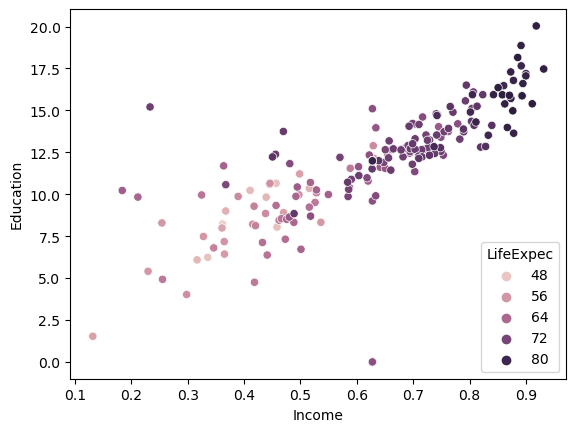

In [25]:
import seaborn as sns

sns.scatterplot(data=df_country_sort, x="Income", y="Education", hue='LifeExpec')

<AxesSubplot: xlabel='Income', ylabel='Education'>

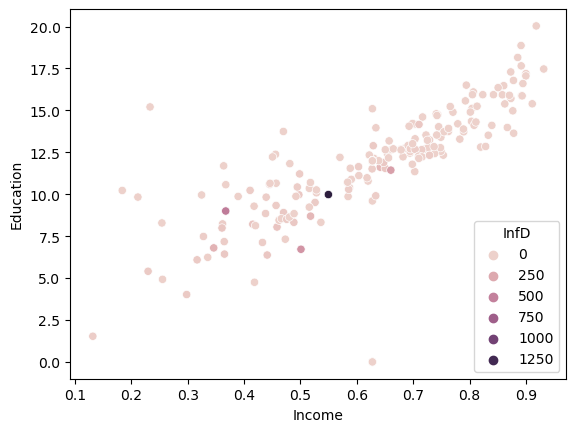

In [32]:
import seaborn as sns

sns.scatterplot(data=df_country_sort, x="Income", y="Education", hue='InfD')

<AxesSubplot: xlabel='Income', ylabel='Education'>

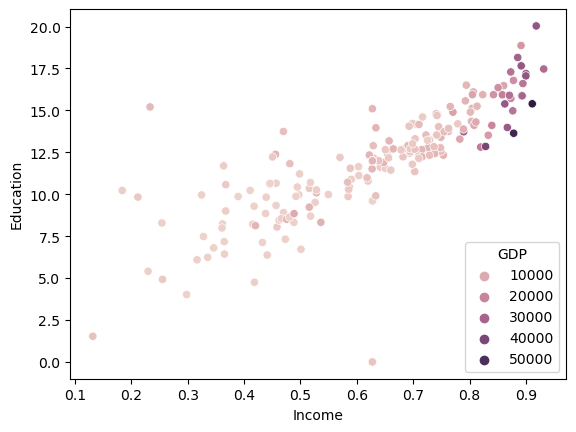

In [29]:
import seaborn as sns

sns.scatterplot(data=df_country_sort, x="Income", y="Education", hue='GDP')

<AxesSubplot: xlabel='Income', ylabel='Education'>

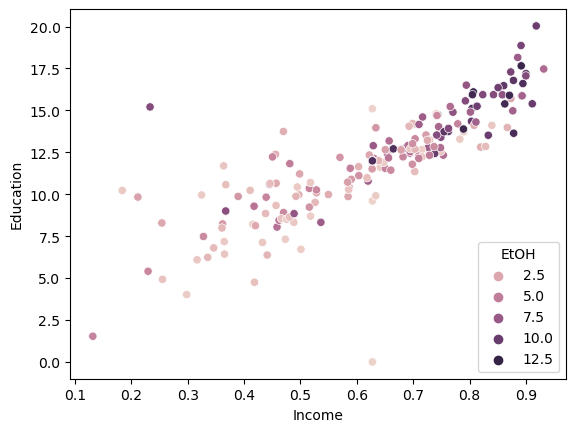

In [26]:
import seaborn as sns

sns.scatterplot(data=df_country_sort, x="Income", y="Education", hue='EtOH')

<AxesSubplot: xlabel='Income', ylabel='Education'>

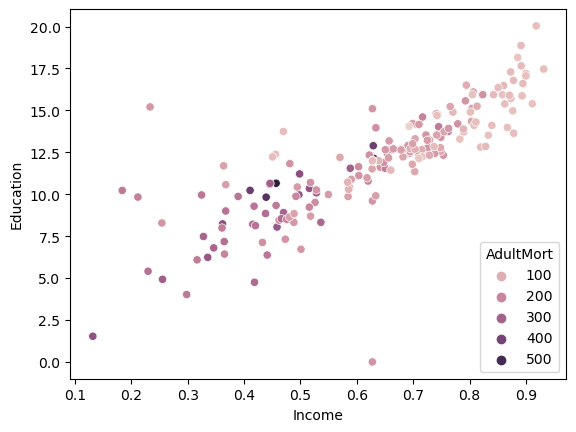

In [25]:
import seaborn as sns

sns.scatterplot(data=df_country_sort, x="Income", y="Education", hue='AdultMort')

In [36]:
fig = px.scatter(df_region_mean,
                 x="LifeExpec",
                 y="Education",
                 color='Income', 
                 #marginal_y="violin",
                 #marginal_x="box", 
                 trendline="ols", 
                 template="presentation")
fig.show()

In [21]:
# x and y given as array_like objects
import plotly.express as px
fig = px.scatter(df,
                 x="LifeExpec", 
                 y="Education",
                 color="Income", 
                 marginal_y="violin",
                 marginal_x="violin", 
                 trendline="ols", 
                 template="presentation")
fig.show()

In [20]:
fig = px.scatter(df, 
                 x="LifeExpec", 
                 y="Income", 
                 color="BMI", 
                 marginal_y="violin",
                 marginal_x="violin", 
                 trendline="ols", 
                 template="presentation")
fig.show()


## Facetting: Scatter plots support faceting.

In [22]:
import plotly.express as px

fig = px.scatter(df, x="LifeExpec", y="Education", color="Status")
#fig.update_layout(hovermode="y") ## You can CHANGE 'y' for 'x'
fig.update_layout(hovermode="y unified")
fig.show()

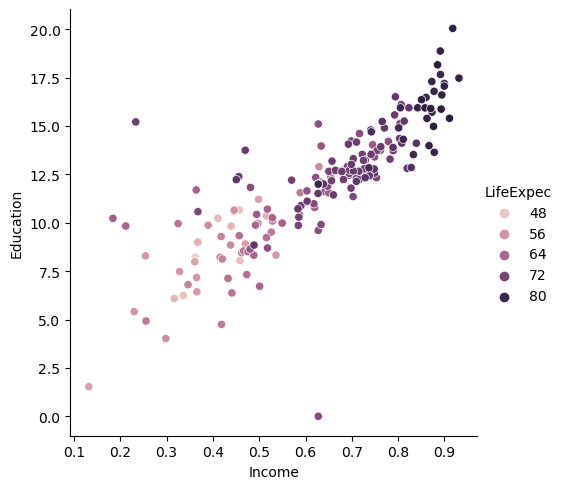

In [18]:
import seaborn as sns

sns.relplot(data=df_country_sort, 
            x="Income", 
            y="Education",
            hue="LifeExpec", 
            kind="scatter"
           )

ValueError: Could not interpret value `DTP` for parameter `hue`

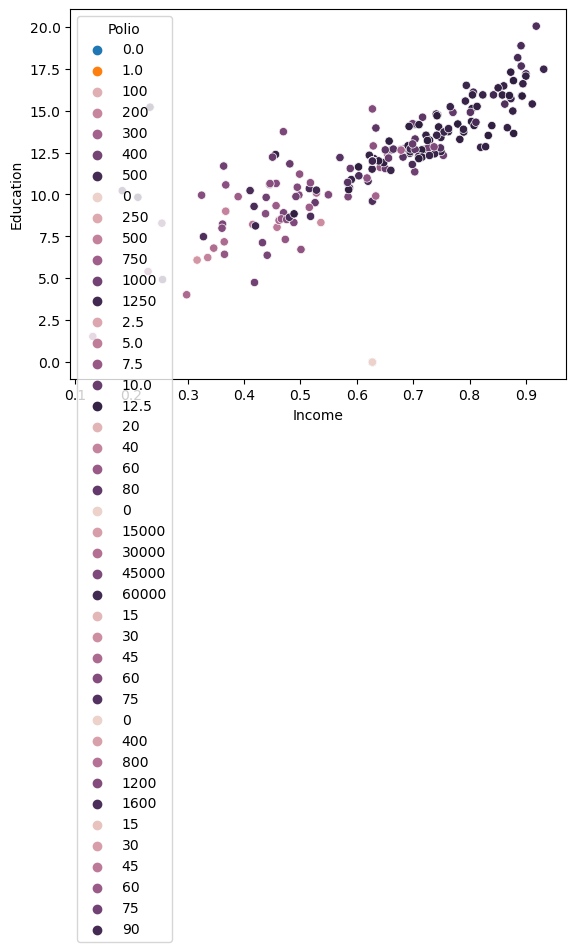

In [42]:
column_names = ['Status','AdultMort',
                'InfD','EtOH','HepB','Measles',
                'BMI','lt5yD','Polio','DTP','HIV',
                'GDP','Population','Thin1_19y','Thin5_9y','Income'
                ]
    
for i in range(17):
    feature = column_names[i]
    sns.scatterplot(data=df_country_sort, x="Income", y="Education", hue=feature, legend = True)

In [39]:
import seaborn as sns

column_names = ['Country','Year','Status','AdultMort',
                'InfD','EtOH','PercExpen','HepB','Measles',
                'BMI','lt5yD','Polio','TotalExpen','DTP','HIV',
                'GDP','Population','Thin1_19y','Thin5_9y','Income'
                ]